# Python for Teaching
## Workshop 1

This workshop will take you through the basic steps of using Python in your course.  Although this is written with Physics courses in mind, it should be useful to anyone wanting to try out Python in the classroom.

We'll go through the basics first, then build up to some common problems you might want to ask your students to do:

* How to download and install Python
* How to run Jupyter and create a new Jupyter notebook
* Navigating and running Jupyter notebooks
* Basic markdown and Python syntax
* Solving our first problem
* Using NumPy for better numerical computing
* Plotting with MatPlotLib

### The Problem

Let's start with the actual problem we'll solve in this workshop.  It's a physics example, but it's also easily extendable to any ordinary differential equation you want.

Consider a particle of mass $m$ moving under the influence of some net force $F$, which might depend on the position $x$ of the particle, or it's velocity 
$$
v \equiv \frac{dx}{dt},
$$
or even the time $t$.  The equation of motion is of course just Newton's second law, $F = ma$, or in differential form
$$
\frac{d^2x}{dt^2} = \frac{F}{m}.
$$
Our goal is to solve this ODE using Python.  In fact, it's important to note that except in special cases ($F$ constant, or dependent on velocity in only very simple ways), this equation *can't$ be solved in any other way than numerically.

In addition to the ODE, we'll also require initial conditions, so let's suppose the particle is released from rest a height $h = 100$ m above the ground, and is under the influence of gravity only for now.  This is a simple case, which means we'll be able to check our results as we go, and then extend to more interesting cases later.

#### The Numerical Setup

Before we play with Python, we need to know *how* to solve problems like this in general.  So bare with me, I'll take this slow so we can see how the algorithm builds.

First, let's rewrite the second-order ODE as two first-order ODEs using the definition of velocity:
$$
\frac{dx}{dt} = v,
$$
$$
\frac{dv}{dt} = \frac{F}{m}.
$$
These are now *coupled* equations, but their first-order nature makes it simple to turn these into "finite difference" equations by supposing the differentials $dx$, $dv$, and $dt$ become finite differences $\Delta x$, $\Delta v$, and $\Delta t$.  One more rewrite for this:
$$
\Delta x = v\, \Delta t,
$$
$$
\Delta v = \frac{F}{m} \, \Delta t.
$$
Now we have a prescription for finding the position $x$ and velocity $v$ at a later time, given those values at an earlier time.

For example, suppose at $t = t_0 = 0$ s, we have $x_0 = 100$ m and $v_0 = 0$ m/s.  What are those quantities a short time $\Delta t$ later?  We can use the subscript to denote each *timestep*, and for concreteness let $\Delta t = 0.01$ s.  Then at $t_1 = t_0 + \Delta t$, we have
$$
x_1 = x_0 + \Delta x = x_0 + v_0 \Delta t \quad \text{and} \quad v_1 = v_0 + \Delta v = v_0 + \frac{F(x_0, v_0, t_0)}{m} \Delta t.
$$
To find $x$ and $v$ at $t_2 = t_1 + \Delta t$, we just repeat the procedure:
$$
x_2 = x_1 + \Delta x = x_1 + v_1 \Delta t \quad \text{and} \quad v_2 = v_1 + \Delta v = v_1 + \frac{F(x_1, v_1, t_1)}{m} \Delta t,
$$
and so on until you've integrated to the time you'd like to stop at.

This method is called *Euler's method*, and it's pretty much the worst one out there -- but also the simplest.  There are cleverer methods that use tricks to reduce error as you propagate the solution, but you can explore those on your own.  Clearly, Euler's method is fairly simple to implement programmatically -- you can even do it in an Excel spreadsheet -- and we'll do that below.

But first -- Python!

### Installing Python

The simplest way to get Python on your (Windows, I assume) computer is via Anaconda, a product that packages up Python as well as a bunch of libraries (which are like extensions of the Python language itself) that are great for numerical computing.  So, download it now:

https://www.anaconda.com/distribution/#download-section

Go for the 3.7 version, it's way better.

Then go ahead and install it -- you can choose "Just for me" and use the default location and default advanced options.  It takes a little while to download and install, so I'll wait.  Don't feel bad about unchecking the "Learn more about ..." buttons, that's what I'm here for.

Okay, all done?  Great.  Now how do we Python, anyway?

### Running Python

Anaconda gives you two decent options for programming in Python:
* *Spyder* is an integrated development environment (IDE) -- it gives you a text editor to write code in, and allows you to run it with output appearing in the window.  It works well, and I recommend trying it out.  But ...
* *Jupyter* is a web server environment for Python, and it allows you to write and run "Notebooks," which can combine both text/images and code.  I think it's a pretty ideal environment for teaching, and it's what we'll use today.

So, click on your start menu, then Anaconda, then Jupyter Notebook.  After a few seconds, a webpage should open in your browser with an address of "localhost:8888/tree."  You can browse to a good location on your computer and then click "New" on the right to open a new Python 3 notebook.

Once in the notebook, look around.  There are options to change the name of it from "Untitled", create a new cell, run the current cell, and, in the drop down box that should say "Code", a way to switch the type of cell.  We'll only use *code* and *markdown* cells.  Change to a Markdown cell and type "# Python for Teaching" and then Run that cell.  You made a heading!  In fact, you can do lots of things in a markdown cell -- it follows standard markdown rules (see for example https://www.markdownguide.org/basic-syntax) and you can also use Latex syntax for equations (in between dollar signs).

### Programming Python

Okay, let's do some actual programming now (finally!).  The customary first program is one that prints the phrase "Hello, world!" to the screen, but in Python that's just a one-liner:

In [13]:
print("Hello, world!")

Hello, world!


But notice a few things:  "print" is a function, which takes a string as input.  We'll make our own functions later.  The string itself is enclosed in double quotes, but single quotes work too.  

Let's do something a little more interesting, but still fairly straightforward:  print the Fibonacci sequence.

In [14]:
n1 = 0
n2 = 1
for i in range(10):
    print(n1)
    n3 = n1 + n2
    n1 = n2
    n2 = n3

0
1
1
2
3
5
8
13
21
34


This is an example of a *loop* in Python -- in this case, a for loop.  The for loop in this case iterates over the numbers 0 to 9, assigning the value of each one to i in each loop. Note that the indent is what tells Python what shold be done in each iteration of the loop.  There are other loops available, too -- a "while" loop can be useful as we'll see below.

Some other things you might need, really quick:
* Importing libraries.  If you need to use things beyond what Python calls "built-ins", you'll need to import them first.  For example, suppose we want to use the number pi:

In [15]:
from math import pi

print(pi)

3.141592653589793


If you need more than just one thing, you can import everything:

In [16]:
from math import *

print(sin(pi/2))

1.0


For reasons of namespace separation, sometimes it's better to import the library with a short name:

In [17]:
import numpy as np

Numpy is the numerical python library, and it has it's own set of math functions, as well as a ton of other stuff.  We'll use it extensively below, so us importing it now is good for later.

In [18]:
print(sin(pi/2))
print(np.sin(np.pi/2))

1.0
1.0


* Strings are a bunch of characters stuck together.  You can define them using quotes, and they can be manipulated in various ways.  For example, suppose you want to take a filename, strip off its extension, and add a new one.  You can do that using the built-in string commands like so:

In [19]:
filename = "test.py"
print(filename)
filename = filename.split(".")
print(filename)
filename = filename[0] + ".png"
print(filename)

test.py
['test', 'py']
test.png


* Functions can make code more resuable and save time.  Let's turn our Fibonacci sequence into a function:

In [20]:
def fibonacci(max = 10):
    n1 = 0
    n2 = 1
    for i in range(max):
        print(n1)
        n3 = n1 + n2
        n1 = n2
        n2 = n3

We can run the function any time we want.  Notice the use of a default input!

In [21]:
fibonacci()
print()
fibonacci(5)
print()
fibonacci(16)

0
1
1
2
3
5
8
13
21
34

0
1
1
2
3

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610


There's lots more about Python that we didn't cover here, of course -- this just scratches the surface.  But it's enough for now -- let's get into NumPy.

### NumPy

NumPy is a package for scientific computing for Python.  It has lots of things that are useful, but what we'll deal with here are NumPy arrays.  Python doesn't have a built-in fast array type (it has lists, which are very slow), and NumPy fills this hole.  Like most other languages, you have to set up these arrays before using them.  Usually you can do that with the zeros function in NumPy, although other initializations are possible:

In [22]:
N = 10
a1 = np.zeros(N)  # creates a 10-element array and fills it with zeros
a2 = np.ones(N)  # creates a 10-element array and fills it with ones
a3 = np.full(N, np.pi)   # creates a 10-element array and fills it with pi

a4 = np.linspace(0, np.pi, N)  # creates a 10-element array and fills it with numbers from 0 to pi
a5 = np.arange(0, np.pi, 0.1)  # creates an array and fills it with numbers from 0 to pi (however many it needs)

print(a1)
print(a2)
print(a3)
print(a4)
print(a5)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265]
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]


You can do operations on array as though they were regular numbers, and you can "slice" them to carve out just some of the data.  Here's some examples:

In [24]:
a6 = a3 + a4
print(a6)
print(a6[0:3])

[3.14159265 3.4906585  3.83972435 4.1887902  4.53785606 4.88692191
 5.23598776 5.58505361 5.93411946 6.28318531]
[3.14159265 3.4906585  3.83972435]


Okay, we're ready to actually tackle our problem.

## Solving the Problem with Python and NumPy

Let's set this up with some variables for our initial conditions and other useful things like constants:

In [25]:
# constants and variables we might need
g = 9.80 # in m/s^2
m = 1.0 # kg

# ICs
x_0 = 100.0 # m
v_0 = 0.0   # m/s
t_start = 0.0
t_end = 4.5 # theory says it should free fall to the ground in 4.51 s

# the timestep -- smaller is better but slower
dt = 0.01

# Initialize an array to hold the time values
t = np.arange(t_start, t_end, dt)

# how many elements are in the array?  This will be useful for other arrays.
N = len(t)  # len is a built-in Python function that tells you how long the array is

# initialize arrays to hold our data
x = np.zeros(N)
v = np.zeros(N)

# Set the first element to the ICs
x[0] = x_0
v[0] = v_0

There's one other thing we'll need before we start the solution, and that's a function for the force the particle feels.  We'll make it a function so that it's easy to change later if we want to.

In [26]:
def force(x, v, t):
    # for now, just take the force to be gravity, directed down
    return -1.0 * m * g
    #return -1.0 * m * g + 0.05 * v**2

That's a lot of initializing, but we're ready to solve the problem now.  All we need is a loop where we implement Euler's method from above, where each array element is found from the previous:
$$
x_{i} = x_{i-1} + \Delta x,
$$
$$
v_{i} = v_{i-1} + \Delta v.
$$
Here it is:

In [27]:
for i in range(1, N):
    
    dx = v[i-1] * dt
    x[i] = x[i-1] + dx
    
    dv = force(x[i-1], v[i-1], t[i-1]) / m * dt
    v[i] = v[i-1] + dv

Okay, what do we have?  Two arrays, for $x$ and $v$, along with the time.  We can print them out, I guess:

In [28]:
print(x)
print(v)

[100.      100.       99.99902  99.99706  99.99412  99.9902   99.9853
  99.97942  99.97256  99.96472  99.9559   99.9461   99.93532  99.92356
  99.91082  99.8971   99.8824   99.86672  99.85006  99.83242  99.8138
  99.7942   99.77362  99.75206  99.72952  99.706    99.6815   99.65602
  99.62956  99.60212  99.5737   99.5443   99.51392  99.48256  99.45022
  99.4169   99.3826   99.34732  99.31106  99.27382  99.2356   99.1964
  99.15622  99.11506  99.07292  99.0298   98.9857   98.94062  98.89456
  98.84752  98.7995   98.7505   98.70052  98.64956  98.59762  98.5447
  98.4908   98.43592  98.38006  98.32322  98.2654   98.2066   98.14682
  98.08606  98.02432  97.9616   97.8979   97.83322  97.76756  97.70092
  97.6333   97.5647   97.49512  97.42456  97.35302  97.2805   97.207
  97.13252  97.05706  96.98062  96.9032   96.8248   96.74542  96.66506
  96.58372  96.5014   96.4181   96.33382  96.24856  96.16232  96.0751
  95.9869   95.89772  95.80756  95.71642  95.6243   95.5312   95.43712
  95.34206  9

But that's not particularly useful.  Given data like this, we really should plot it.  The best tool for that in Python is MatPlotLib.

### MatPlotLib

MatPlotLib is a libray for Python dedicated to many different types of plots.  We need to import the library -- in this case, the interface we'll use is called *pyplot*:

In [29]:
import matplotlib.pyplot as plt

Plotting with matplotlib can be either complicated or simple, depending on how much control you want over the final plot.  Let's try it out with our arrays above.

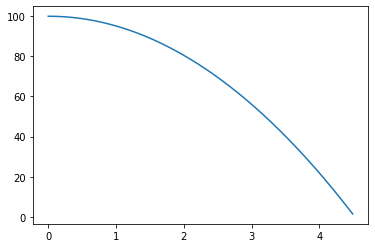

In [30]:
plt.plot(t, x)
plt.show()

That ... looks pretty good, actually.  It's parabolic, which we expect.  I wonder how it compares to the analytic solution, which of course is
$$
x(t) = x_0 + v_0 t - \tfrac{1}{2}gt^2.
$$
We can do that in the plot, too.  While we're at it, we'll do the same for velocity, and I'll put some axis labels on, too.

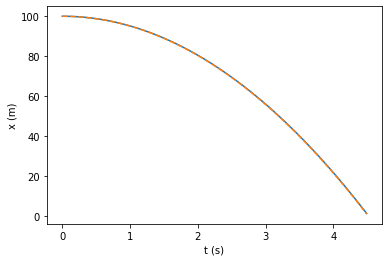

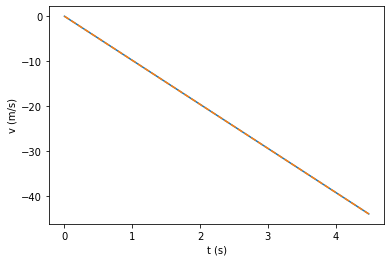

In [31]:
plt.plot(t, x)
plt.plot(t, x_0 + v_0 * t - 0.5 * g * t**2, "--")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()

plt.plot(t, v)
plt.plot(t, v_0 - g * t, "--")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()

There we go!

Of course, this is a boring problem.  Let's make it more interesting by introducing an additional force, say drag:
$$
F_d  = c v^2,
$$
where $c$ is some coefficient.  This is easy to do, we just change the force function above to add in this additional term (setting $c$ to some reasonable value).  I'll let you do that, and you can compare the drag case to the analytical examples above.  Have fun!